# Alignment (Exploratory)
This notebook looks at the differences between a train and test set, specifically the NC17_EvalPart1 (train) and MFC18_EvalPart1 (test) datasets. Insights from this exploratory analysis will hopefully give us a better sense of how we can use sample-based explanations to help us fix the domain mismatch between these two datasets, and bring them into closer "alignment" with one another.

In [1]:
import os
import sys
sys.path.insert(0, os.getcwd() + '/../')  # for scripts
sys.path.insert(0, os.getcwd() + '/../../')  # for util

from scripts.alignment_explore1 import feature_similarity
from scripts.alignment_explore2 import ablation
data_dir = '../../data'

/Users/Jonny/Documents/research/interpretability/classification/trees/myenv/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


## Feature Similarity
This section analyzes the similarity of data points between the train and test sets, specifically looking at the extracted feature representations and using a kernel to measure the similarity between points.

model (LGBMClassifier)
train set acc: 1.000000
missed train instances (0)
train log loss: 0.02060
model (LGBMClassifier)
test set acc: 0.817634
missed test instances (3177)
test log loss: 0.58381

test and train similarity: 0.301
manip test and train similarity: 0.282
nonmanip test and train similarity: 0.306
manip test and manip train similarity: 0.182
manip test and nonmanip train similarity: 0.342
nonmanip test and manip train similarity: 0.132
nonmanip test and nonmanip train similarity: 0.409


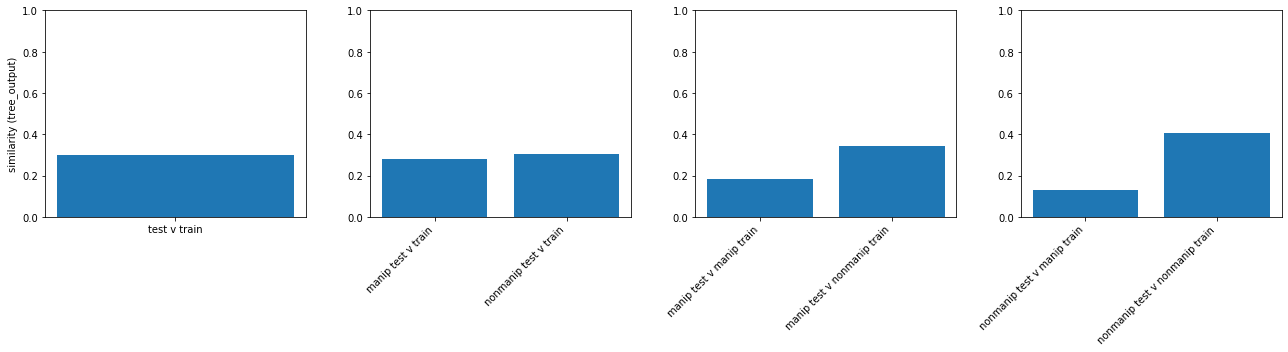

In [8]:
feature_similarity(model='lgb', encoding='tree_output', dataset='medifor', n_estimators=100, random_state=1,
                   test_subset=20000, agg_type='mean', data_dir=data_dir, verbose=False)

model (LGBMClassifier)
train set acc: 1.000000
missed train instances (0)
train log loss: 0.02060
model (LGBMClassifier)
test set acc: 0.817634
missed test instances (3177)
test log loss: 0.58381

test and train similarity: 0.934
manip test and train similarity: 0.882
nonmanip test and train similarity: 0.934
manip test and manip train similarity: 0.716
manip test and nonmanip train similarity: 0.882
nonmanip test and manip train similarity: 0.741
nonmanip test and nonmanip train similarity: 0.934


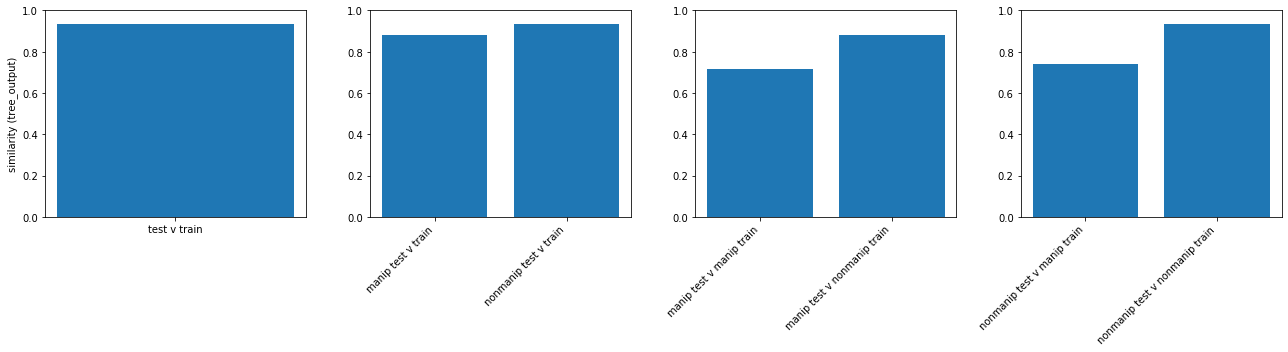

In [9]:
feature_similarity(model='lgb', encoding='tree_output', dataset='medifor', n_estimators=100, random_state=1,
                   test_subset=20000, agg_type='max', data_dir=data_dir, verbose=False)

## Feature Ablation
This section analyzes the effect of removing various features from the training data. We greedily remove features one at a time that have the biggest impact on the test set.

100%|██████████| 36/36 [00:22<00:00,  1.18it/s]


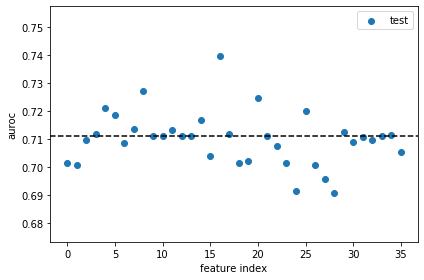

auroc before removal: 0.711 (test), 1.000 (train)
auroc after removal: 0.740 (test)
removed feature: p_fibberinh_1_0_mediforsystem, index: 16, original index: 16


100%|██████████| 35/35 [00:19<00:00,  1.81it/s]


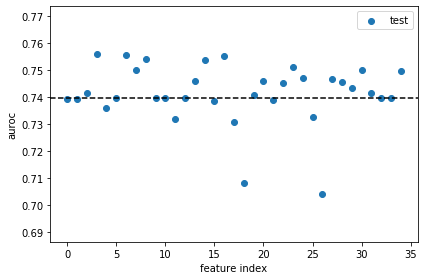

auroc before removal: 0.740 (test), 1.000 (train)
auroc after removal: 0.756 (test)
removed feature: combo01_baseline_ta1, index: 3, original index: 4


100%|██████████| 34/34 [00:16<00:00,  2.11it/s]


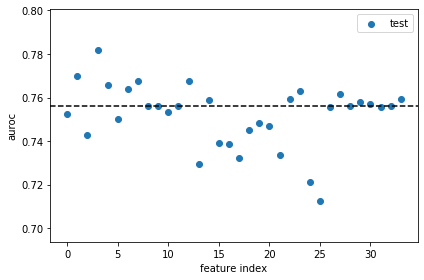

auroc before removal: 0.756 (test), 1.000 (train)
auroc after removal: 0.782 (test)
removed feature: copymove01_baseline_ta1, index: 3, original index: 5


100%|██████████| 33/33 [00:16<00:00,  2.00it/s]


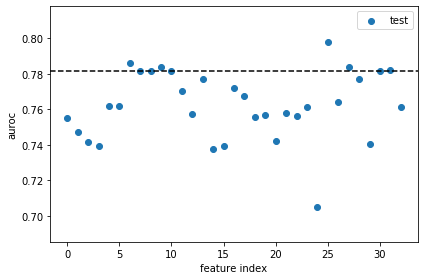

auroc before removal: 0.782 (test), 1.000 (train)
auroc after removal: 0.798 (test)
removed feature: p_ucrlstmwresamplingwcmm2_1_0_mediforsystem, index: 25, original index: 28


100%|██████████| 32/32 [00:15<00:00,  2.16it/s]


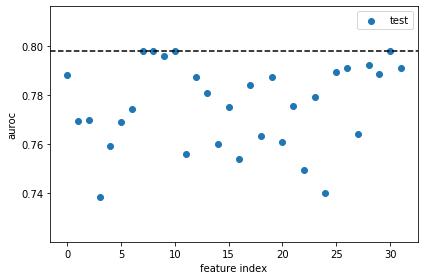

features removed: [16, 4, 5, 28]


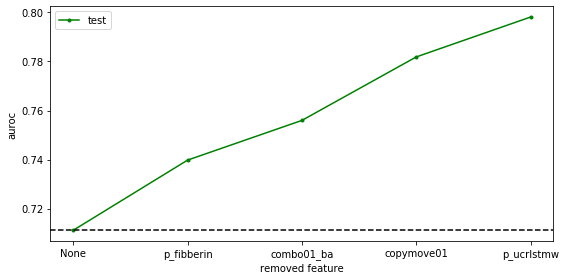

In [2]:
ablation(model='lgb', dataset='medifor', n_estimators=100, random_state=1, plot=True, data_dir=data_dir)